## Importing the required libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [4]:
air = pd.read_csv(r"C:\Users\RoshanSalunke\OneDrive\Documents\AirPassengers.csv")

In [5]:
air  # number of passangers in 1000s


# aim is to do forcast for next 12 months (1961)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### Converting columns into Date Time format

In [6]:
air.Month = pd.to_datetime(air.Month , infer_datetime_format= True) 

In [7]:
air = air.set_index(["Month"])

In [8]:
air

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [9]:
air.columns

Index(['Passengers'], dtype='object')

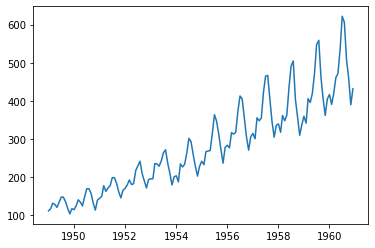

In [10]:
plt.plot(air)

In [9]:
# It is an uptrend and since mean and variance both are changing it is not stationary

In [10]:
air.diff()

# 1st level of differencing

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [18]:
log_air = np.log(air)

# this is the base 

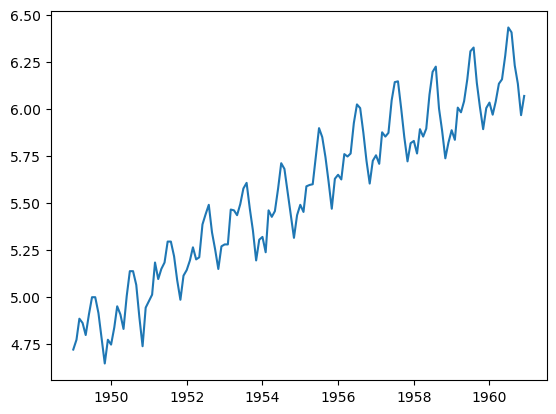

In [19]:
plt.plot(log_air)

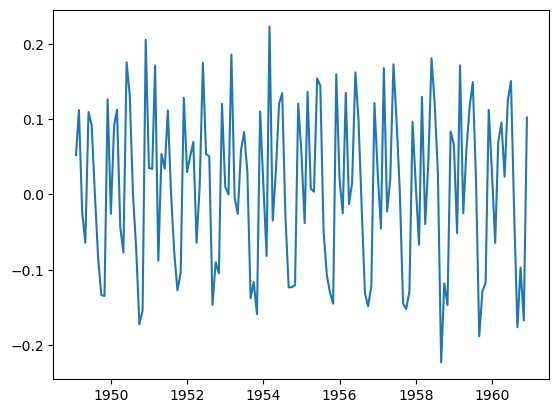

In [20]:
plt.plot(log_air.diff())

# log cannot work with negative values 

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
seasonal = seasonal_decompose(air.Passengers)

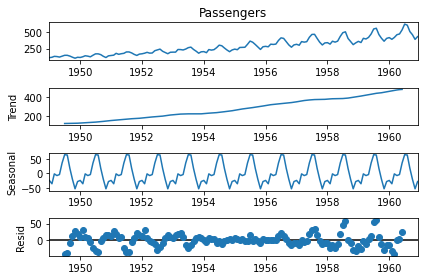

In [13]:
seasonal.plot();

### Normality Test

In [14]:
def adf_test_normality(series):
    from statsmodels.tsa.stattools import adfuller
    adfuller(series)
    p_value = adfuller(series)[1]
    print('pvalue=',p_value)
    if p_value<0.05:
        print('p_value < 0.05')
        print('series is stationary')
    else:
        print('p_value > 0.05')
        print('series is not stationary')

In [16]:
adf_test_normality(air.Passengers)

pvalue= 0.991880243437641
p_value > 0.05
series is not stationary


In [20]:
log_air = np.log(air)

In [17]:
# After Taking the log my original base series is log_airpass and log_airpass would be used to build the model
# so after doing prediction  we need to take anti log

### ACF & PACF Plots

In [18]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

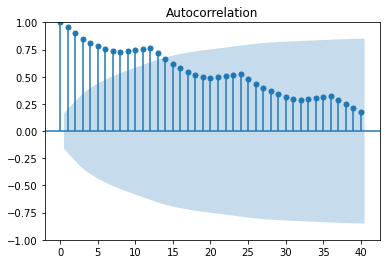

In [21]:
plot_acf(log_air.Passengers , lags = 40);

C:\Users\RoshanSalunke\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


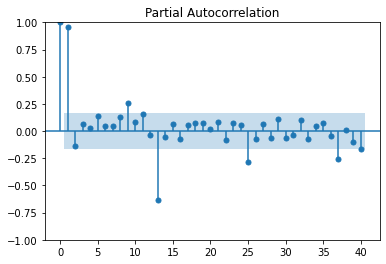

In [22]:
plot_pacf(log_air.Passengers , lags = 40);

In [23]:
# we got the values of P , D , Q now lets build the model 

In [30]:
# building the model using AUTO ARIMA and SARIMA

In [27]:
import pmdarima

from pmdarima import auto_arima

In [28]:
auto_arima(log_air , seasonal= True , m = 12 )

# 

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model_sarima = SARIMAX(log_air , order = (2,0,0) , seasonal_order= (0,1,1,12))

C:\Users\RoshanSalunke\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [32]:
results = model_sarima.fit() 

# model created over here

In [33]:
pred = results.predict(start = 144 , end = 155)

# prediction for next one year

In [36]:
pred_after_anti_log = np.round(np.exp(pred))

# these are the prediction for next one year

### Plot of forecasted Values

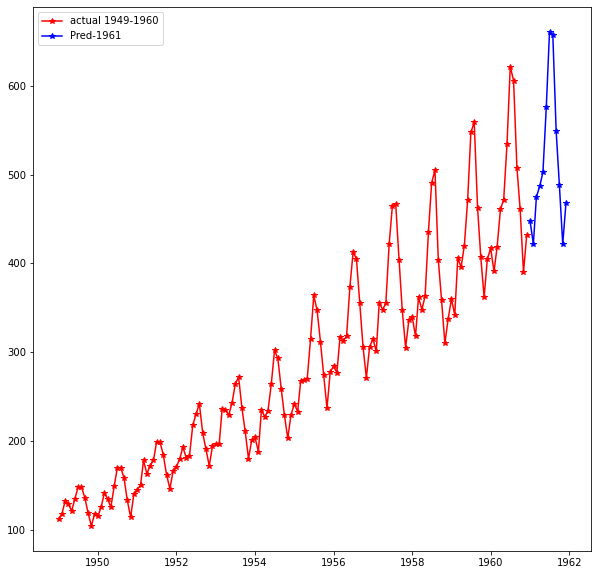

In [38]:
plt.figure(figsize= (10,10))
plt.plot(air , color = "r" , marker = "*" , label = "actual 1949-1960")
plt.plot(pred_after_anti_log , color = "b" , marker = "*" , label = "Pred-1961" )
plt.legend()

# year on year its in uptrend and with a year its seasonal

## Lets build the model after doing the sampling

In [39]:
train = log_air.iloc[0:132 , ] # 1st 11 years on train

test = log_air.iloc[132:144 ,] # last one year on test

In [40]:
auto_arima(log_air ,seasonal= True , m = 12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [41]:
model_sarima = SARIMAX(train , order = (2,0,0) , seasonal_order=(0,1,1,12))

C:\Users\RoshanSalunke\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [42]:
results1 = model_sarima.fit()

In [43]:
abc = round(np.exp(results1.predict(start = 132 , end = 143)))
abc

1960-01-01    420.0
1960-02-01    399.0
1960-03-01    466.0
1960-04-01    453.0
1960-05-01    471.0
1960-06-01    544.0
1960-07-01    618.0
1960-08-01    625.0
1960-09-01    522.0
1960-10-01    457.0
1960-11-01    402.0
1960-12-01    446.0
Freq: MS, Name: predicted_mean, dtype: float64

### Now Comparing the predicted values with the actual

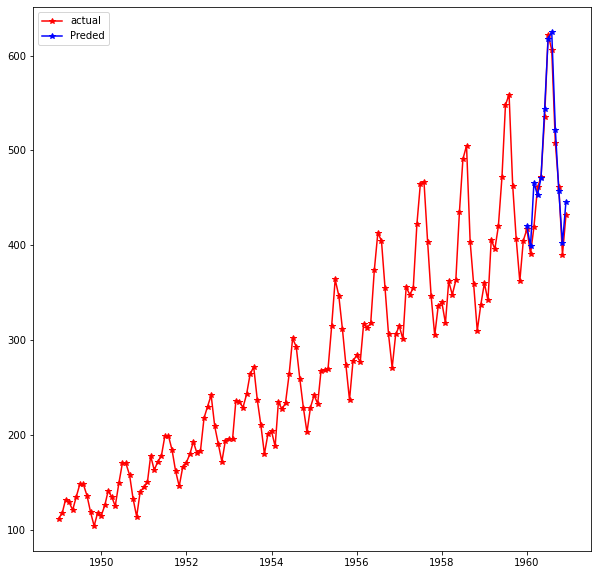

In [45]:
plt.figure(figsize= (10,10))
plt.plot(air , color = "r" , marker = "*" , label = "actual")
plt.plot(abc , color = "b" , marker = "*" , label = "Preded" )
plt.legend()

# year on year its in uptrend and with a year its seasonal

In [52]:
import tabulate as tb

In [53]:
df = pd.DataFrame()
df["Actual 1960"] = np.exp(test)
df["Predicted 1960"] = abc
df["Error"] = df["Actual 1960"] - df["Predicted 1960"]
df["Percentage error"] = np.abs(df.Error)*100 / df["Actual 1960"]

print(tb.tabulate(df , headers= "keys" , tablefmt = "fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════════╤═════════╤════════════════════╕
│ Month               │   Actual 1960 │   Predicted 1960 │   Error │   Percentage error │
╞═════════════════════╪═══════════════╪══════════════════╪═════════╪════════════════════╡
│ 1960-01-01 00:00:00 │           417 │              420 │      -3 │           0.719424 │
├─────────────────────┼───────────────┼──────────────────┼─────────┼────────────────────┤
│ 1960-02-01 00:00:00 │           391 │              399 │      -8 │           2.04604  │
├─────────────────────┼───────────────┼──────────────────┼─────────┼────────────────────┤
│ 1960-03-01 00:00:00 │           419 │              466 │     -47 │          11.2172   │
├─────────────────────┼───────────────┼──────────────────┼─────────┼────────────────────┤
│ 1960-04-01 00:00:00 │           461 │              453 │       8 │           1.73536  │
├─────────────────────┼───────────────┼──────────────────┼─────────┼────────────────────┤
│ 1960-05-

In [55]:
MSE = np.mean(np.square(df.Error))
MSE

279.75000000000085

In [57]:
MAPE = np.mean(np.abs(df["Percentage error"]))
MAPE

2.6109798323565943

In [58]:
RMSE = np.sqrt(MSE)
RMSE

16.725728683677758

# Conclusion

 Through the analysis of this air passenger time series dataset, we have gained valuable insights into the behavior of air travel over time. Our models have identified seasonal patterns and trends, which can help us forecast future demand and optimize our operations. Additionally, we have identified factors that influence air passenger traffic, which can inform our pricing and marketing strategies. Overall, this analysis has allowed us to make better-informed decisions and improve our airline's performance. We hope that this repository will be a valuable resource for others interested in exploring air travel trends and patterns.